### Effect of immigration rate changes on job vacancy rate changes

In [1]:
# Import libraries and objects
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings # for muting warning messages
# mute warning messages
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from ISLP import load_data
from ISLP.models import summarize

Let's take a look at the `Boston` data set

In [24]:
path = r"C:\Users\gibra\clone\team_project\data\processed\GibranAlvarez\canada_full_data.csv"

In [25]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
immigration_job_vacancy = pd.read_csv(path)
immigration_job_vacancy


,year,Quarter,GEO,Migration_rate,vacancy_rate_change
0,2015,2,Canada,41.00,-24.35
1,2015,3,Canada,9.45,-10.34
2,2015,4,Canada,-11.61,-14.10
3,2016,1,Canada,23.66,-5.97
4,2016,2,Canada,2.38,20.63
5,2016,3,Canada,-22.73,0.00
6,2016,4,Canada,-21.43,-6.58
7,2017,1,Canada,35.86,2.82
8,2017,2,Canada,7.11,19.18
9,2017,3,Canada,-10.10,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

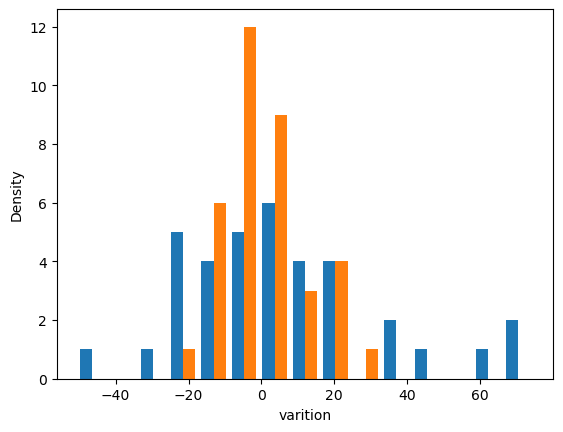

In [36]:
fig, ax = plt.subplots()
plt.hist(immigration_job_vacancy[['Migration_rate','vacancy_rate_change']], bins=15)
ax.set_xlabel('varition')
ax.set_ylabel('Density')
plt.show

## Simple Linear Regression

We will use the `immigration_job_vacancy`  data set where will build a regression model to quantify the effect of the `Migration_rate` (predictor) on the `vacancy_rate_change`.
Noting from the distribution of the change rates and the scatter plots we can see that both variables seem to have a normal distribution which can imply that their changes are randomly distributed and therefore the variables not related.

To start, we use the `sm.OLS()` function to fit a simple linear regression model. Our response will be `vacancy_rate_change` (Y) and `Migration_rate` (X) will be the single predictor. For this model, we can create the model matrix by hand.

In [26]:
# Extract the response and fit the model
model = sm.OLS.from_formula('vacancy_rate_change ~ Migration_rate', data=immigration_job_vacancy)
result = model.fit()



In [27]:
# Summarize results
summarize(result)

,coef,std err,t,P>|t|
Intercept,-0.2419,1.971,-0.123,0.903
Migration_rate,0.0737,0.070,1.056,0.298


The output tells us that ˆβ0 = −0.2419 and ˆβ1 = 0.0737

In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     vacancy_rate_change   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     1.115
Date:                 Sun, 23 Jun 2024   Prob (F-statistic):              0.298
Time:                         10:47:53   Log-Likelihood:                -138.18
No. Observations:                   36   AIC:                             280.4
Df Residuals:                       34   BIC:                             283.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2419      1.971     -0.123      0.903      -4.247       3.764
Migration_rate     0.0737      0.070      1.056      0.298      -0.068       0.216
==============================================================================
Omnibus:                        1.593   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                0.917
Skew:                           0.384   Prob(JB):                        0.632
Kurtosis:                       3.152   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To compute the 95% confidence intervals for the regression coefficient estimates based on the standard errors:

In [41]:
# Get confidence intervals for coefficients
conf_intervals = result.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(conf_intervals)

Confidence Intervals for Coefficients:
                       0         1
Intercept      -4.247283  3.763527
Migration_rate -0.068181  0.215649


From the $R^2$ statistic we can see that almost none of the variation in `Migration_rate` is explained by `vacancy_rate_change`. This might be an indication that there are other variables in the data set that are affecting the response.

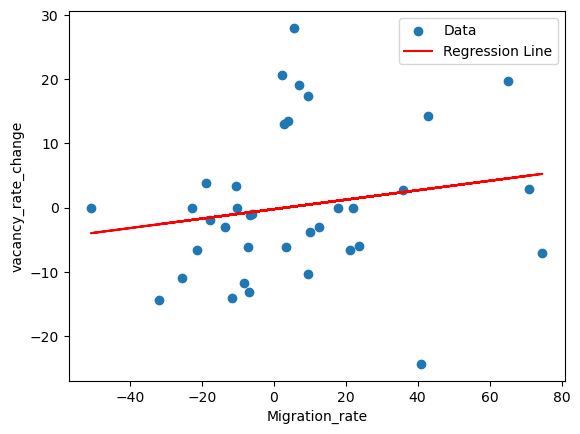

In [ ]:
# Extract the variables
vrc = immigration_job_vacancy['vacancy_rate_change'].values.reshape(-1, 1)
mr = immigration_job_vacancy['Migration_rate'].values.reshape(-1, 1)

# Plot data
plt.scatter(mr, vrc, label='Data')
plt.xlabel('Migration_rate')
plt.ylabel('vacancy_rate_change')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(mr, vrc)

# Plot the regression line
plt.plot(mr, lm.predict(mr), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Migration_rate')
plt.ylabel('vacancy_rate_change')
plt.legend()

# Show the plot
plt.show()

*These exercises were adapted from :* James, Gareth, et al. An Introduction to Statistical Learning: with Applications in Python, Springer, 2023.